# NATURAL LANGUAGE PROCESSING (COMM061)
# ChatBot Building

The goal of this project is to design a chatbot using various natural language processing techniques. In recent years, chatbots have become widely popular across all industries thanks to technological advancements. In the realm of human-machine interaction, chatbots are one of the most promising and advanced expressions.Making a chatbot that makes conversation more contexual and personalized experience to the end user is very important. Depending upon the target audience, a chatbot can be built using a wide variety of tools and approaches.

In this assignment, the Chatbot utilizes various NLP techniques such as Intent classification that determines the intent of the end user, Named Entity Recognition that identifies entities within the conversation, and Dialog Flow Manager, which predicts the next action of the users. As part of individual coursework, I have selected intent-based classification, following the steps of preprocessing, feature engineering, building models, and testing models to determine the best fit models to build a final chatbot.

### Intent CLassification: 
The Natural Language Processing (NLP) enables chatbots to interprest the user's requests and facilate with the desired outputs. 
A conversation engine in NLP will enable users to have more contextual conversations with the chatbot and offer personalized experiences to them and Intent classification is one of the most crucial parts of the conversation engine. Implementation of this intent classification is quite complex. During the process of intent classification implementation Text input is identified by  "classifier", which will associate the information provided with a specific "intent", producing a detailed explanation of the words for the computer to understand.

As an intial step to this, the data set is procured form github which consists of various tags and associated text fields. To build the models I have Models -KNN & logistics regression to train the model on the given set of data and predict the accuracy results. 
Dataset ref link: https://github.com/aishgrt/AI-Guild/blob/main/Intent%20Classification%20using%20BERT/data_full.json

In [211]:
# Required libraries to perform the tasks 

import numpy as np
import pandas as pd
import json
import nltk
import string
import os
import math
import datetime
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc
from sklearn.metrics import confusion_matrix, classification_report

In [212]:
random_seed = 42
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

In [213]:
# To plot graphs 
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

In [214]:
# The data set is in the json format and has been imported using the below given function and subsequent cells are to 
#convert json file into csv
import json
with open('data_full.json') as json_file:
    data = json.load(json_file)
data_train =data['train']
data_test=data['test']
data_val=data['val']

In [215]:
train_data=[]
test_data=[]
val_data=[]

In [216]:
tag=['insurance',
 'next_holiday',
 'repeat',
 'credit_limit_change',
 'book_hotel',
 'yes',
 'damaged_card',
 'rewards_balance',
 'time',
 'pto_balance',
 'interest_rate',
 'change_volume',
 'taxes',
 'sync_device',
 'traffic',
 'what_song',
 'shopping_list',
 'todo_list_update',
 'order_checks',
 'shopping_list_update']

In [217]:
for x in data_train:
    if x[1] in tag:
        train_data.append(x)

In [218]:
for x in data_test:
    if x[1] in tag:
        test_data.append(x)

In [219]:
for x in data_val:
    if x[1] in tag:
        val_data.append(x)

In [220]:
df = pd.DataFrame(train_data)
df.to_csv('train_data.csv', index=False,header=('value','intent'))
train=pd.read_csv('train_data.csv')
print(len(train))
train.head()

2000


,value,intent
0,"what time is it in punta gorda, florida",time
1,"what time is it in glenwood springs, co",time
2,"what time is it in fredericksburg, tx",time
3,"what time is it in las vegas, nv",time
4,"what time is it in houston, tx",time


In [221]:
df = pd.DataFrame(test_data)
df.to_csv('test_data.csv', index=False,header=('value','intent'))
test=pd.read_csv('test_data.csv')
print(len(test))
test.head()

600


,value,intent
0,i need you to tell me what time it is in new y...,time
1,"what time is it in adelaide, australia right now",time
2,is it after noon,time
3,is it six o clock yet,time
4,please give me the time in tanzania at this mo...,time


In [222]:
df = pd.DataFrame(val_data)
df.to_csv('val_data.csv', index=False,header=('value','intent'))
valid=pd.read_csv('val_data.csv')
print(len(valid))
valid.head()

400


,value,intent
0,what time is it in france,time
1,what's the time in london right now,time
2,what hour is it in london,time
3,what's the time,time
4,what is the time in london,time


In [223]:
#Combining train and validation data sets 
train = train.append(valid).reset_index(drop=True)

In [224]:
#Combining test data set to make it uniform 
train = train.append(test).reset_index(drop=True)

# Exploratory data analysis and Visualization

In [225]:
#Number of rows and columns present in dataset
train.shape

(3000, 2)

In [226]:
# Count of intents
train['intent'].value_counts()

time                    150
shopping_list_update    150
traffic                 150
shopping_list           150
credit_limit_change     150
interest_rate           150
pto_balance             150
taxes                   150
book_hotel              150
what_song               150
change_volume           150
next_holiday            150
damaged_card            150
sync_device             150
todo_list_update        150
insurance               150
yes                     150
repeat                  150
rewards_balance         150
order_checks            150
Name: intent, dtype: int64

C:\Users\jp01532\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


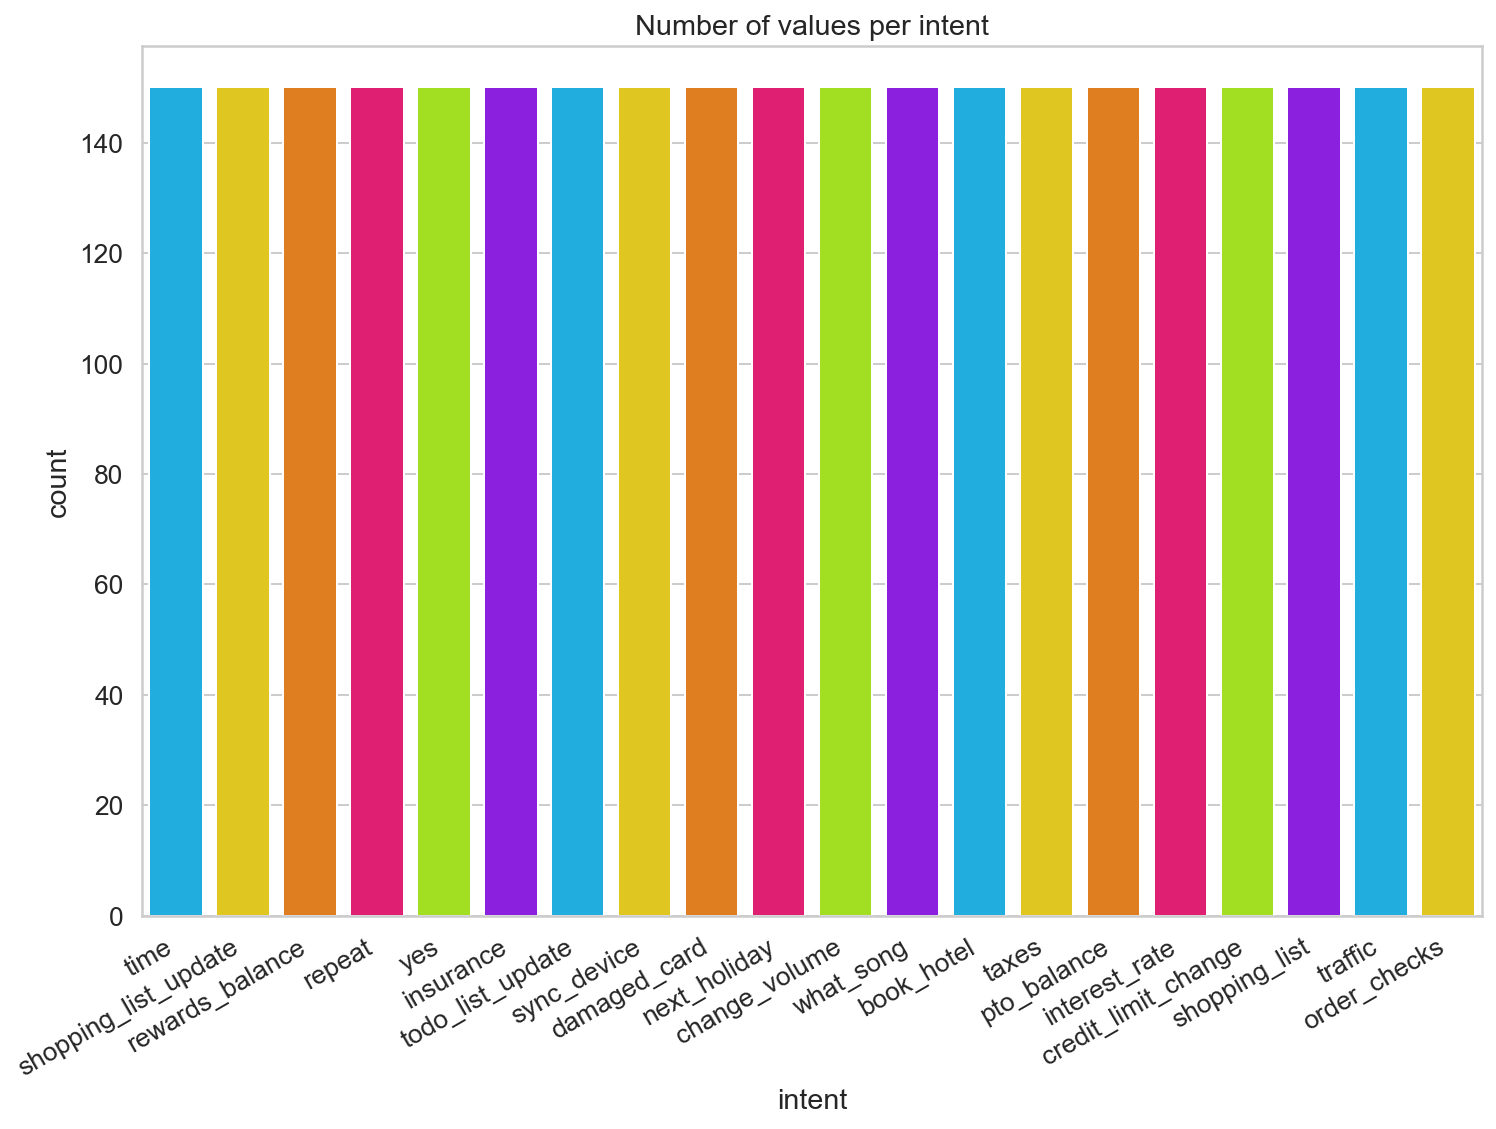

In [227]:
# Number of values present per intent 
chart = sns.countplot(train.intent, palette=HAPPY_COLORS_PALETTE)
plt.title("Number of values per intent")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

In [228]:
#Checking for NA values present in the dataset 
print(df.isna().sum())

0    0
1    0
dtype: int64


In [229]:
from nltk import FreqDist
from collections import Counter

def get_top_freq(doc, k=50):
    doc_words = train['value']
    fd_doc_words = Counter([word.lower() for word in doc_words])
    top_words = fd_doc_words.most_common(k)

    return top_words

In [230]:
print(f"Top 50 words of the datset:\n{get_top_freq(train['value'])}")

Top 50 words of the datset:
[('what time is it in punta gorda, florida', 1), ('what time is it in glenwood springs, co', 1), ('what time is it in fredericksburg, tx', 1), ('what time is it in las vegas, nv', 1), ('what time is it in houston, tx', 1), ('i need to know the current time in the central timezone', 1), ('would you tell me the current time in the eastern timezone', 1), ('let me know the current time in the central timezone', 1), ('tell me what time it is in the central timezone', 1), ('i am needing to know the current time in the eastern timezone', 1), ('what is the time right now in the hst timezone', 1), ('can you tell me the current time', 1), ('what is the current time in cst', 1), ('i need to know what time it is in florida', 1), ('what is the time right now', 1), ('in the mst time zone, what time is it right now', 1), ('tell me what time it is right now', 1), ('can you tell me the current time in the pacific timezone', 1), ('look up the time in california', 1), ('what i

# Text Processing: Tokenization, Stop words removal Lemmtisation and Stemming

In [231]:
# Install the required library and functions
import nltk,re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
stem = SnowballStemmer('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jp01532\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jp01532\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [232]:
# List of stop words present in the NLTK library
stop = stopwords.words('english')
exclude = ['against', 'not', "don't","aren't", 'couldn', "couldn't",
            "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 
             'haven', "haven't", 'isn', "isn't", 
             "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [233]:
# Creating a new list of stop word
stop_words = [word for word in stop if word not in exclude]

In [234]:
# Tokenizing the value field, removal of spaces, html tags and the applying stemming
def text_preprocessed(texts): 
    text_list=[]
    for sent in texts:
        if isinstance(sent, str) == False:
            sent = ""
            
        filtered_sentence=[]
        
        sent = sent.lower() # converting the sentence to lowercase values 
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
        
        for word in word_tokenize(sent):
            if(not word.isnumeric()) and (len(word)>2) and (word not in stop_words):  
                  filtered_sentence.append(stem.stem(word))   # Stem and add to filtered list
        final_string = " ".join(filtered_sentence) # final string of cleaned words
 
        text_list.append(final_string)
        
    return text_list

In [235]:
# Lematising the text values
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer  = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jp01532\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jp01532\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [236]:
def lematization(text):
    text_lemma = [lemmatizer.lemmatize(word) for word in text]
    return text

#### Test and Trainin split 
For building the KNN model I have considered the train and test split of 80, 20. 
I have also tried the experiment with other combinations like 70:30 however this split is giving the best accuracy results when the model is trained 

In [237]:
# Train and Test dat split for model building 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train[["value"]],
                                                  train["intent"],
                                                  test_size=0.20,
                                                  shuffle=True,
                                                  random_state=324
                                                 )

In [238]:
# Applying the preprocessing on the test and train split 
X_train['value'] = text_preprocessed(X_train["value"])
X_test['value'] = text_preprocessed(X_test["value"])

In [239]:
X_train

,value
581,insur benefit get
1466,ve save number day vacat
1167,hear speaker
1216,pari get hotel room peopl march 1st 3rd
1381,tell state tax
...,...
600,need add chore vacuum task list
1531,given interest rate
908,day next free day calendar pleas
756,disconnect phone pleas


In [240]:
X_test

,value
2213,turn volum pleas
251,mani reward point mastercard
1186,tell song listen
1818,traffic like around stadium
759,could connect phone pleas
...,...
1584,let know alli interest rate
1723,need hear shop list
1370,amount money pay tax pleas
2943,traffic expect way newark new jersey philadelphia


In [241]:
# Applying the lemmatisation on the test and train split 
X_train['value'] = X_train["value"].apply(lambda x: lematization(x))
X_train['value']

581                           insur benefit get
1466                   ve save number day vacat
1167                               hear speaker
1216    pari get hotel room peopl march 1st 3rd
1381                             tell state tax
                         ...                   
600             need add chore vacuum task list
1531                        given interest rate
908            day next free day calendar pleas
756                      disconnect phone pleas
2713                              quieter pleas
Name: value, Length: 2400, dtype: object

In [242]:
X_test['value'] = X_test["value"].apply(lambda x: lematization(x))
X_test['value']

2213                                     turn volum pleas
251                          mani reward point mastercard
1186                                     tell song listen
1818                          traffic like around stadium
759                             could connect phone pleas
                              ...                        
1584                          let know alli interest rate
1723                                  need hear shop list
1370                           amount money pay tax pleas
2943    traffic expect way newark new jersey philadelphia
2857                     find interest rate check account
Name: value, Length: 600, dtype: object

In [243]:
# Converting the train and test data to list to conduct feature engineering
X_train_list = X_train['value'].tolist()
X_test_list = X_test['value'].tolist()

In [244]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

In [245]:
from sklearn.preprocessing import StandardScaler

In [246]:
print('Class labels:', np.unique(y_train))

Class labels: ['book_hotel' 'change_volume' 'credit_limit_change' 'damaged_card'
 'insurance' 'interest_rate' 'next_holiday' 'order_checks' 'pto_balance'
 'repeat' 'rewards_balance' 'shopping_list' 'shopping_list_update'
 'sync_device' 'taxes' 'time' 'todo_list_update' 'traffic' 'what_song'
 'yes']


In [247]:
print('Class labels:', np.unique(y_test))

Class labels: ['book_hotel' 'change_volume' 'credit_limit_change' 'damaged_card'
 'insurance' 'interest_rate' 'next_holiday' 'order_checks' 'pto_balance'
 'repeat' 'rewards_balance' 'shopping_list' 'shopping_list_update'
 'sync_device' 'taxes' 'time' 'todo_list_update' 'traffic' 'what_song'
 'yes']


### Feature Engineering & Building Model with KNN Algoritham 
For feature enginering, to convert the textual values into machine understandable values, I have utised the CountVectorizer for this model.

In [248]:
pipeline = Pipeline([
    ('text_vect', CountVectorizer(binary=True,
                                  max_features=15)),
    ('knn', KNeighborsClassifier())  
                                ])

# Visualize the pipeline
# This will come in handy especially when building more complex pipelines, stringing together multiple preprocessing steps
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('text_vect', CountVectorizer(binary=True, max_features=15)),
                ('knn', KNeighborsClassifier())])

In [249]:
# Converting processed text values into list
X_train = X_train_list
X_test = X_test_list

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train.values)

Pipeline(steps=[('text_vect', CountVectorizer(binary=True, max_features=15)),
                ('knn', KNeighborsClassifier())])

In [250]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Use the fitted pipeline to make predictions on the validation dataset
test_predictions = pipeline.predict(X_test)
print("Accuracy Score for KNN Model :", accuracy_score(y_test.values, test_predictions))

Accuracy Score for KNN Model : 0.48333333333333334


In [251]:
score_knn = accuracy_score(y_test.values, test_predictions)
score_knn

0.48333333333333334

In [252]:
cm_KNN = confusion_matrix(y_test.values, test_predictions)
cm_KNN

array([[ 0,  0,  0,  0,  0,  1,  0,  8,  0, 28,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 19,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0, 23,  0,  0,  1,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  4,  7,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  2,  0,  0, 18,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  7,  2,  6,  0, 14,  0,  0,  0,  0,  0,  0,
         0,  0,  2,  0],
       [ 0,  0,  0,  0,  1,  0,  7,  0, 10, 17,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0, 20,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  6,  0, 16,  3,  0,  0,  0,  0,  0,  3,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  0, 32,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  3,  5,  0,  0

In [253]:
print(classification_report(y_test.values, test_predictions))

                      precision    recall  f1-score   support

          book_hotel       0.00      0.00      0.00        38
       change_volume       0.00      0.00      0.00        20
 credit_limit_change       0.74      0.85      0.79        27
        damaged_card       0.58      0.19      0.29        36
           insurance       0.00      0.00      0.00        24
       interest_rate       0.37      0.21      0.27        33
        next_holiday       0.37      0.20      0.26        35
        order_checks       0.48      0.87      0.62        23
         pto_balance       0.62      0.55      0.58        29
              repeat       0.17      0.91      0.29        35
     rewards_balance       0.35      0.58      0.43        26
       shopping_list       0.43      0.67      0.53        30
shopping_list_update       0.28      0.26      0.27        35
         sync_device       1.00      0.97      0.98        32
               taxes       1.00      0.97      0.98        31
       

C:\Users\jp01532\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jp01532\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jp01532\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


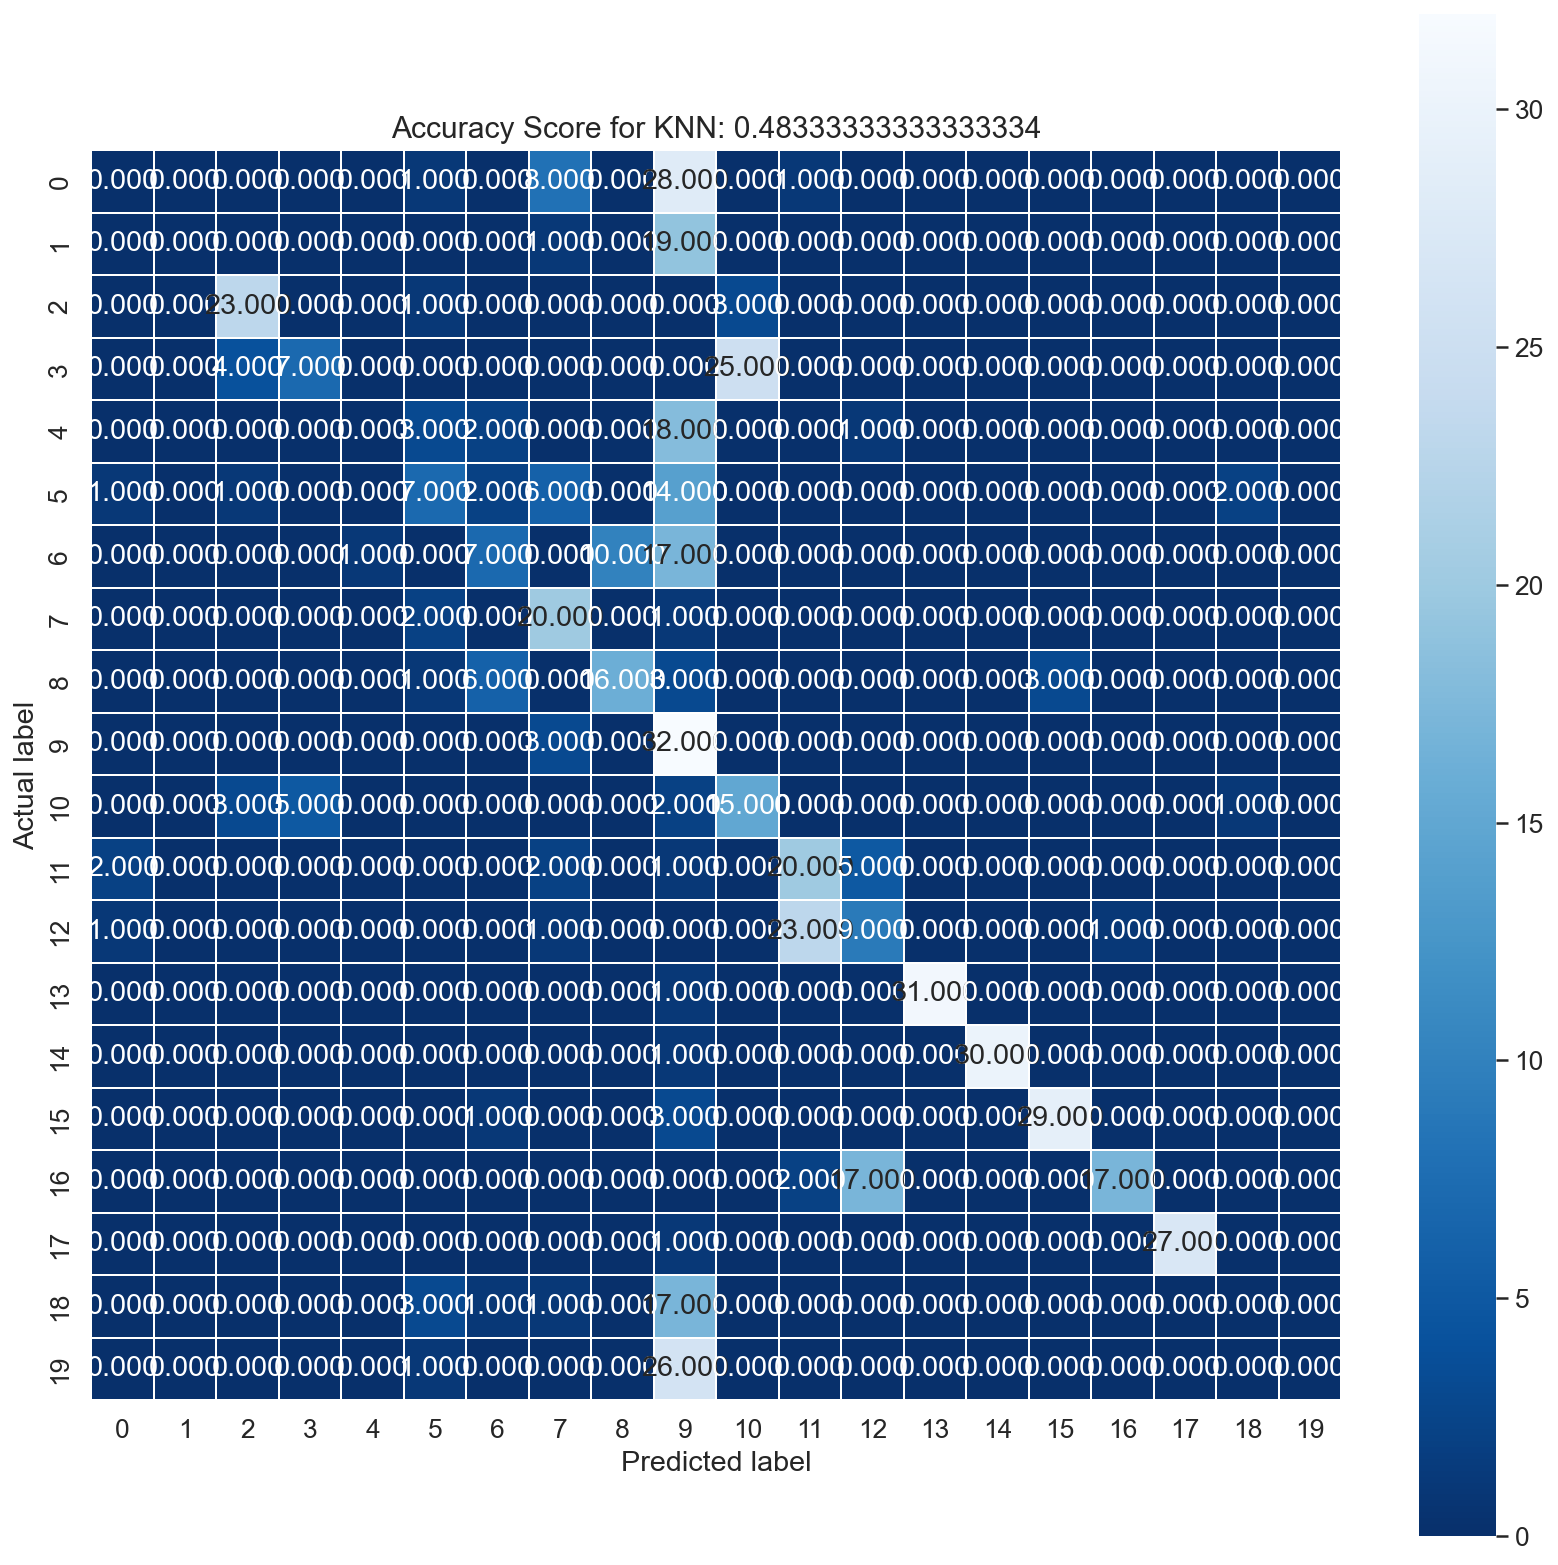

In [254]:
plt.figure(figsize=(14,14))
sns.heatmap(cm_KNN, annot=True, fmt=".3f", linewidths=.10, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for KNN: {0}'.format(score_knn)
plt.title(all_sample_title, size = 15);

####  When the KNN algorithm is implemented on the dataset, model is predicting the correct values with an accuracy of 48%. KNN is a simple and easy to implement algorithm, widely used to solve the classification problems. However, when the KNN is implemented on large volume of data it's performance decreases significantly. Considering the small size of the current dataset, the accuracy levels are extremely low, so it is not suggested to build a bot that can handle large amounts of data.

 Enf od KNN

In [255]:
train.head

<bound method NDFrame.head of                                                   value        intent
0               what time is it in punta gorda, florida          time
1               what time is it in glenwood springs, co          time
2                 what time is it in fredericksburg, tx          time
3                      what time is it in las vegas, nv          time
4                        what time is it in houston, tx          time
...                                                 ...           ...
2995  may i order more checks for my well's fargo ac...  order_checks
2996  do you know how i order more checks for my wel...  order_checks
2997  what do i do to order new checkbooks for my we...  order_checks
2998  how do i order more checkbooks for my well's f...  order_checks
2999  where do i go to order more checks for my well...  order_checks

[3000 rows x 2 columns]>

#### Intent Classification with Logistic Regression applied on original data set train and test

In this section, model is build using Logistic regression algoritham and tested against the expected user intent for a given set of values. For building this model, I have considered the test and train split ratio as 70:30 

In [256]:
#Test and train split
train_x, test_x = train_test_split(train, test_size = 0.3, stratify = train['intent'], random_state=21)

In [257]:
train_x.shape, test_x.shape

((2100, 2), (900, 2))

In [258]:
# Applying preprocessing steps as the split ratio is different the values are store into different variables 
train_x['value'] = text_preprocessed(train_x["value"])
test_x['value'] = text_preprocessed(test_x["value"])

C:\Users\jp01532\AppData\Local\Temp/ipykernel_12760/1196304408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['value'] = text_preprocessed(train_x["value"])
C:\Users\jp01532\AppData\Local\Temp/ipykernel_12760/1196304408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['value'] = text_preprocessed(test_x["value"])


In [259]:
train_x, test_x

(                                   value               intent
 1617                  credit limit chang  credit_limit_change
 1506  find interest rate allianc account        interest_rate
 1836               traffic like way work              traffic
 2413                  current time dalla                 time
 1195                           what titl            what_song
 ...                                  ...                  ...
 802               card split half report         damaged_card
 1808        traffic like way north shore              traffic
 2640              tell report damag card         damaged_card
 2857    find interest rate check account        interest_rate
 2097                 tell true statement                  yes
 
 [2100 rows x 2 columns],
                                         value                intent
 166                      remov chip shop list  shopping_list_update
 293                         calcul point visa       rewards_balance
 694     

In [260]:
# Applying lemmatisation 
train_x['value'] = train_x["value"].apply(lambda x: lematization(x))
train_x['value']

C:\Users\jp01532\AppData\Local\Temp/ipykernel_12760/784041108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['value'] = train_x["value"].apply(lambda x: lematization(x))


1617                    credit limit chang
1506    find interest rate allianc account
1836                 traffic like way work
2413                    current time dalla
1195                             what titl
                       ...                
802                 card split half report
1808          traffic like way north shore
2640                tell report damag card
2857      find interest rate check account
2097                   tell true statement
Name: value, Length: 2100, dtype: object

In [261]:
test_x['value'] = test_x["value"].apply(lambda x: lematization(x))
test_x['value']

C:\Users\jp01532\AppData\Local\Temp/ipykernel_12760/2933755080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['value'] = test_x["value"].apply(lambda x: lematization(x))


166                        remov chip shop list
293                           calcul point visa
694             remind mop later put list today
2898    increas credit limit travel reward card
200                     high reward discov card
                         ...                   
873                                 card broken
515                          insur give benefit
794                        abl get phone moment
171                            shop list carrot
50                                         time
Name: value, Length: 900, dtype: object

In [262]:
train_x.shape, test_x.shape

((2100, 2), (900, 2))

In [263]:
train_x.intent.value_counts(normalize=True)

credit_limit_change     0.05
interest_rate           0.05
repeat                  0.05
pto_balance             0.05
rewards_balance         0.05
yes                     0.05
next_holiday            0.05
change_volume           0.05
book_hotel              0.05
sync_device             0.05
insurance               0.05
damaged_card            0.05
order_checks            0.05
shopping_list_update    0.05
taxes                   0.05
todo_list_update        0.05
what_song               0.05
time                    0.05
traffic                 0.05
shopping_list           0.05
Name: intent, dtype: float64

In [264]:
test_x.intent.value_counts(normalize=True)

shopping_list_update    0.05
rewards_balance         0.05
interest_rate           0.05
damaged_card            0.05
next_holiday            0.05
what_song               0.05
taxes                   0.05
time                    0.05
order_checks            0.05
pto_balance             0.05
book_hotel              0.05
repeat                  0.05
yes                     0.05
traffic                 0.05
sync_device             0.05
insurance               0.05
shopping_list           0.05
credit_limit_change     0.05
todo_list_update        0.05
change_volume           0.05
Name: intent, dtype: float64

In [265]:
# importing required libraries
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [266]:
# For feature enginering of this test and train split, I have utilised tfidf vectorizer to convert the textual values to numerical values 
tfidf_vectorizer = TfidfVectorizer(lowercase= True, max_features=1000, stop_words=ENGLISH_STOP_WORDS)

In [267]:
tfidf_vectorizer.fit(train_x.value)

TfidfVectorizer(max_features=1000,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))

In [268]:
train_idf = tfidf_vectorizer.transform(train_x.value)
test_idf  = tfidf_vectorizer.transform(test_x.value)

In [269]:
model_LR = LogisticRegression()

In [270]:
model_LR.fit(train_idf, train_x.intent)

LogisticRegression()

In [271]:
predict_train = model_LR.predict(train_idf)

In [272]:
predict_test = model_LR.predict(test_idf)

In [273]:
# f1 score on train data
score_LogisticRegression = f1_score(y_true= train_x.intent, y_pred= predict_train, average='micro')
score_LogisticRegression

0.979047619047619

####  Logistic regression is a predictive analysis model where is the used to describe data and explain relationship between dependent and independent variables . When the model is applied with this it produces the highest accuracy value of 97.

In [274]:
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(lowercase=True,
                                                      max_features=1000,
                                                      stop_words= ENGLISH_STOP_WORDS)),
                            ('model', LogisticRegression())])

In [275]:
pipeline.fit(train_x.value, train_x.intent)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
                                                       'anything', 'anyway',
                                                       'anywhere', ...}))),
                ('model', LogisticRegression())])

In [276]:
pipeline.predict(train_x.value)

array(['credit_limit_change', 'interest_rate', 'traffic', ...,
       'damaged_card', 'interest_rate', 'yes'], dtype=object)

In [277]:
#Testing the Intent for the given value of input
text = ["i want to book a hotel in florida"]

In [278]:
pipeline.predict(text)

array(['book_hotel'], dtype=object)

In [279]:
text1 = ["what time is it now in florida"]

In [280]:
pipeline.predict(text1)

array(['time'], dtype=object)

In [281]:
from sklearn import metrics

In [282]:
#Visualising the results 
y_true= train_x.intent
y_pred= predict_train

In [283]:
confusion_matrix = metrics.confusion_matrix(y_true,y_pred)

In [284]:
print(confusion_matrix)

[[105   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0 104   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0 104   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0 105   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 105   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   1   0 102   0   2   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 101   0   1   0   0   0   0   0   0   2   0   0
    0   1]
 [  0   0   0   0   0   0   0 105   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   0 100   0   0   0   0   0   0   4   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   0  98   0   0   0   0   0   4   0   0
    0   2]
 [  0   0   0   0   0   0   0   0   0   0 105   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  98   6   0   0   0

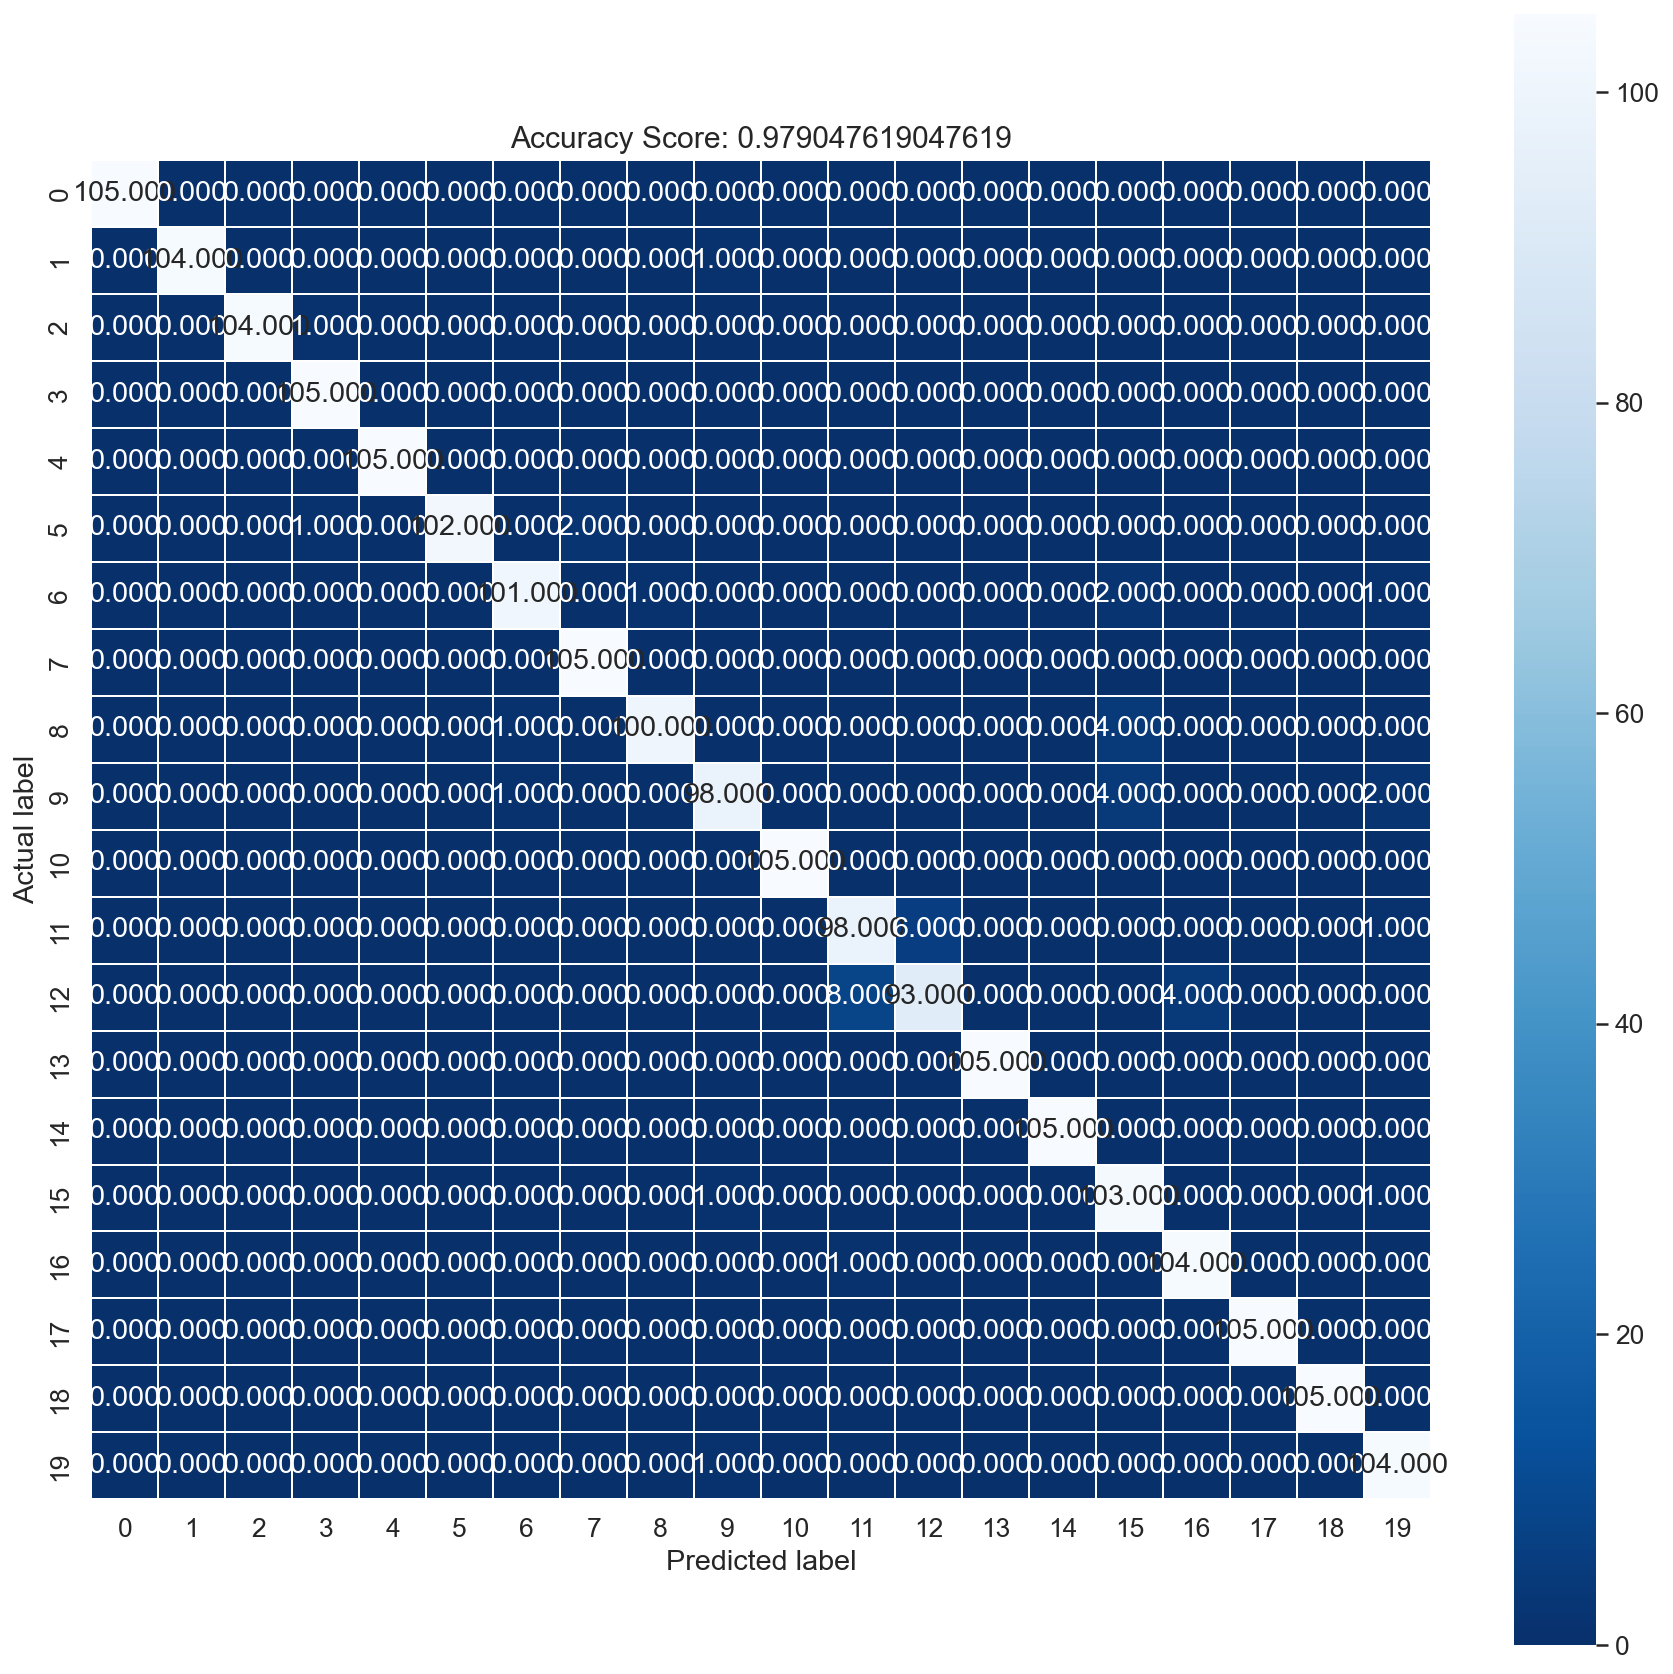

In [285]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.8, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_LogisticRegression)
plt.title(all_sample_title, size = 15);

In [286]:
print(classification_report(y_true,y_pred))

                      precision    recall  f1-score   support

          book_hotel       1.00      1.00      1.00       105
       change_volume       1.00      0.99      1.00       105
 credit_limit_change       1.00      0.99      1.00       105
        damaged_card       0.98      1.00      0.99       105
           insurance       1.00      1.00      1.00       105
       interest_rate       1.00      0.97      0.99       105
        next_holiday       0.98      0.96      0.97       105
        order_checks       0.98      1.00      0.99       105
         pto_balance       0.99      0.95      0.97       105
              repeat       0.97      0.93      0.95       105
     rewards_balance       1.00      1.00      1.00       105
       shopping_list       0.92      0.93      0.92       105
shopping_list_update       0.94      0.89      0.91       105
         sync_device       1.00      1.00      1.00       105
               taxes       1.00      1.00      1.00       105
       

In [287]:
#Comparing the scores 
print("Accuracy Score for KNN Model :", accuracy_score(y_test.values, test_predictions))
print("Accuracy Score for Logistic Regression Model :", score_LogisticRegression)

Accuracy Score for KNN Model : 0.48333333333333334
Accuracy Score for Logistic Regression Model : 0.979047619047619


For Intent calssification, the training process consists of finding patterns in input data so that the model can map a given input to an output or intent/tag. Though it produces the high accuracy values, if the sample size is small then the model doesn't perform well. It over fits the results as the number of observations are less. So it fails to learn from the given data. 

For chatbots to perform well in identifying the user intents and providing them with relevant information, it is very essential that the models are trained with large data sets so they can perform well in real time. In this case of intent classification, Logistic Regression is a better fit model because it recognizes the relations between inputs and outputs more accurately than other models which is the main goal of intent classification.